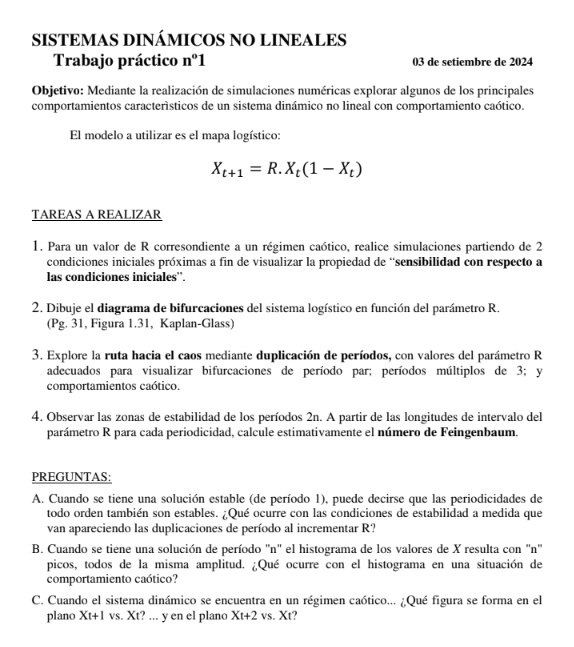

#####################################################################################################################################################################################################################################################################################################################

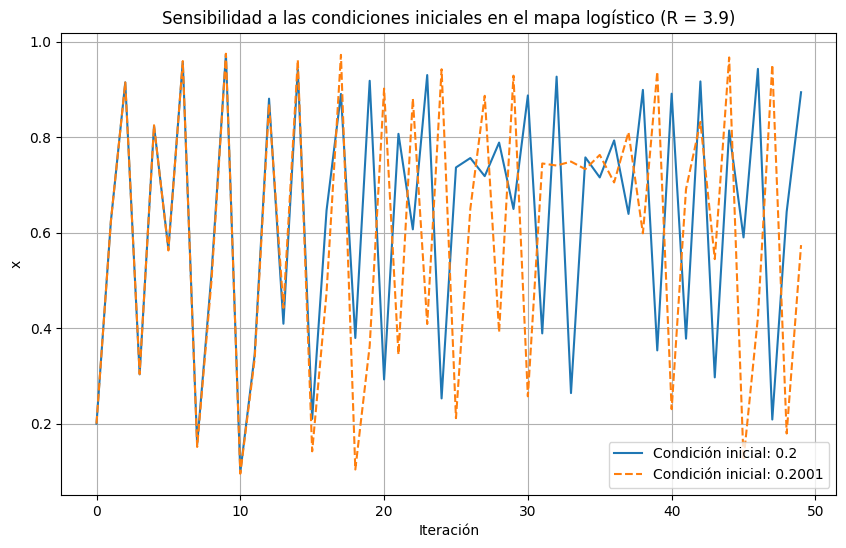

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mapa logístico
def logistic_map(x, r):
    return r * x * (1 - x)

# Parámetros
R = 3.9  # Régimen caótico
iterations = 50
initial_conditions = [0.2, 0.2001]  # Condiciones iniciales cercanas

# Simulación
def simulate_logistic(r, x0, iterations):
    trajectory = [x0]
    for i in range(iterations - 1):
        x0 = logistic_map(x0, r)
        trajectory.append(x0)
    return trajectory

# Simulaciones para dos condiciones iniciales cercanas
trajectory1 = simulate_logistic(R, initial_conditions[0], iterations)
trajectory2 = simulate_logistic(R, initial_conditions[1], iterations)

# Visualización de la "sensibilidad a las condiciones iniciales"
plt.figure(figsize=(10, 6))
plt.plot(trajectory1, label=f"Condición inicial: {initial_conditions[0]}")
plt.plot(trajectory2, label=f"Condición inicial: {initial_conditions[1]}", linestyle="--")
plt.title("Sensibilidad a las condiciones iniciales en el mapa logístico (R = 3.9)")
plt.xlabel("Iteración")
plt.ylabel("x")
plt.legend()
plt.grid(True)
plt.show()

#####################################################################################################################################################################################################################################################################################################################

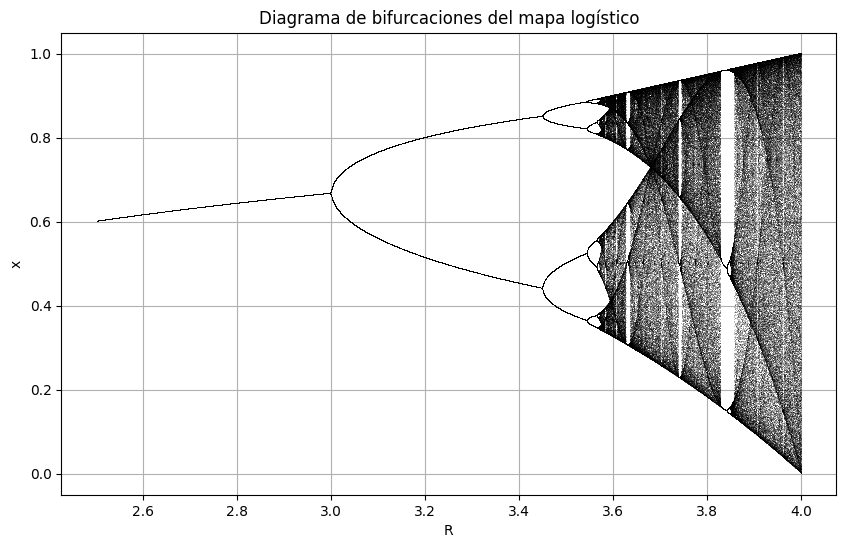

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

# Mapa logístico
def logistic_map(x, r):
    return r * x * (1 - x)
# Diagrama de bifurcaciones
def bifurcation_diagram(r_min, r_max, iterations, last, x0=0.5):
    r_values = np.linspace(r_min, r_max, 10000)
    x = np.ones(10000) * x0
    plt.figure(figsize=(10, 6))

    for i in range(iterations):
        x = logistic_map(x, r_values)
        if i >= (iterations - last):
            plt.plot(r_values, x, ',k', alpha=0.25)

    plt.title("Diagrama de bifurcaciones del mapa logístico")
    plt.xlabel("R")
    plt.ylabel("x")
    plt.grid(True)
    plt.show()

# Parámetros del diagrama de bifurcaciones
r_min = 2.5
r_max = 4.0
iterations = 1000
last = 100  # Últimas iteraciones para el gráfico

# Generar y mostrar el diagrama de bifurcaciones
bifurcation_diagram(r_min, r_max, iterations, last)



#####################################################################################################################################################################################################################################################################################################################

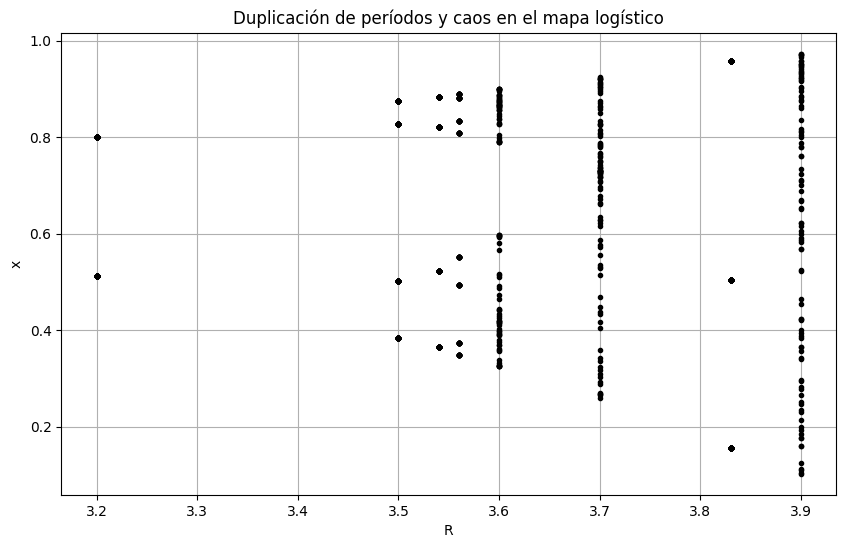

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets

# Mapa logístico
def logistic_map(x, r):
    return r * x * (1 - x)

# Parámetros
iterations = 1000
last = 100  # Últimas iteraciones para observar los puntos fijos
x0 = 0.5  # Condición inicial

# Exploración de valores de R
r_values = [3.2, 3.5, 3.54, 3.56, 3.6, 3.7, 3.83, 3.9]  # Incluye bifurcaciones y caos

# Visualización de las bifurcaciones de período par, múltiplos de 3 y caos
plt.figure(figsize=(10, 6))
for r in r_values:
    x = x0
    trajectory = []
    for i in range(iterations):
        x = logistic_map(x, r)
        if i >= (iterations - last):
            trajectory.append(x)
    plt.plot([r] * len(trajectory), trajectory, 'ok', markersize=3)  # Aumentar tamaño de puntos

plt.title("Duplicación de períodos y caos en el mapa logístico")
plt.xlabel("R")
plt.ylabel("x")
plt.grid(True)
plt.show()


Valores de 𝑅 : Vamos a usar una serie de valores de 𝑅  conocidos para mostrar estas transiciones, desde comportamientos de período 2, 4, 8 (pares) y múltiplos de 3.  Para cada valor de 𝑅 , ejecutamos el mapa logístico durante varias iteraciones y observamos el comportamiento del sistema.  Mostraremos los puntos fijos (valores de 𝑥 ) que el sistema alcanza después de varias iteraciones para cada valor de 𝑅 .

#####################################################################################################################################################################################################################################################################################################################

In [ ]:
import pandas as pd
import numpy as np

seed = 0.6765432
n = 100000  # Número de valores diferentes de R
iters = 1000  # Número de iteraciones del mapa logístico
acc = 8  # Precisión decimal

def logistic(L, x):
    """Función logística."""
    return L * x * (1 - x)

def feigenbaum(seed, acc, iters, n):
    """
    Calcula la constante de Feigenbaum utilizando el análisis de zonas
    de estabilidad de los períodos 2^n.

    Parámetros:
        - seed: Semilla inicial para la iteración.
        - acc: Precisión decimal para el redondeo.
        - iters: Número de iteraciones del mapa logístico.
        - n: Número de valores de R diferentes.

    Retorna:
        - Aproximación de la constante de Feigenbaum.
    """
    # Crear la serie de valores de R (L) y la matriz inicial para las iteraciones
    L_values = np.linspace(2.8, 4.0, n)  # Reducimos el rango a [2.8, 4.0]
    iterations = np.zeros((n, iters))
    iterations[:, 0] = seed  # Inicializar la primera columna con la semilla

    # Generar las iteraciones del mapa logístico utilizando numpy
    for i in range(1, iters):
        iterations[:, i] = logistic(L_values, iterations[:, i - 1])

    # Conservar solo las últimas 50 iteraciones y redondear a la precisión especificada
    iterations = iterations[:, -50:]
    iterations = np.round(iterations, acc)

    # Crear un DataFrame con los valores de R y las iteraciones
    data = pd.DataFrame(iterations, columns=[f"Iter_{i}" for i in range(50)])
    data['L'] = L_values

    # Transformar a una estructura más manejable y contar valores únicos por R
    melted = data.melt(id_vars='L', var_name='iteration', value_name='value')
    unique_counts = melted.groupby('L')['value'].nunique().reset_index()

    # Identificar los valores de R donde ocurren las duplicaciones de períodos
    doubling_points = {}
    for target_period in [2, 4, 8, 16, 32]:  # Períodos 2^n
        doubling_R = unique_counts.loc[unique_counts['value'] == target_period, 'L']
        if not doubling_R.empty:
            doubling_points[target_period] = doubling_R.values[0]  # Tomar el primer valor de R

    # Asegurarnos de tener suficientes puntos de duplicación
    if len(doubling_points) < 3:
        raise ValueError("No se detectaron suficientes duplicaciones para calcular la constante de Feigenbaum.")

    # Calcular las longitudes de los intervalos entre los valores de R
    intervals = []
    periods = sorted(doubling_points.keys())
    for i in range(len(periods) - 1):
        R_n = doubling_points[periods[i]]
        R_n1 = doubling_points[periods[i + 1]]
        intervals.append(R_n1 - R_n)

    # Calcular el número de Feigenbaum como el límite del cociente de los intervalos
    feigenbaum_approximations = [intervals[i] / intervals[i + 1] for i in range(len(intervals) - 1)]

    # Retornar el valor aproximado con la precisión especificada
    return round(np.mean(feigenbaum_approximations), acc)


# Llamada a la función
try:
    resultado = feigenbaum(seed, acc, iters, n)
    print(f"Constante de Feigenbaum (aproximada): {resultado}")
except ValueError as e:
    print(f"Error: {e}")


Constante de Feigenbaum (aproximada): 2.46466476


# *PREGUNTAS*


### A. **Condiciones de estabilidad al aumentar R y duplicaciones de período**
Cuando se tiene una solución estable de período 1, es decir, cuando el sistema converge a un único valor fijo, esto implica que el comportamiento del sistema es predecible y no varía con el tiempo. A medida que incrementamos el parámetro \( R \), el sistema puede experimentar **duplicaciones de período**: es decir, el período de la solución estable se duplica, pasando de un período 1 a un período 2, luego a un período 4, luego 8, y así sucesivamente.

- **Duplicaciones de período**: A medida que \( R \) aumenta, las soluciones periódicas se vuelven inestables, y el sistema comienza a pasar por diferentes ciclos periódicos más largos, que corresponden a **bifurcaciones**. Estas bifurcaciones corresponden a la aparición de soluciones de mayor período (períodos 2, 4, 8, etc.).
- **Condiciones de estabilidad**: La estabilidad de estas soluciones se ve afectada a medida que el parámetro \( R \) aumenta. Al principio, cuando el sistema tiene un comportamiento periódico de bajo período (como 2 o 4), el sistema sigue siendo estable. Sin embargo, con el aumento de \( R \), las bifurcaciones se vuelven más complejas, y finalmente, el sistema entra en un régimen **caótico**, donde las soluciones ya no siguen una periodicidad estable, sino que se vuelven impredecibles.

: **las condiciones de estabilidad cambian drásticamente** a medida que se van duplicando los períodos. Las soluciones se vuelven inestables, pasando de ser un comportamiento periódico a un comportamiento caótico a medida que el parámetro \( R \) alcanza ciertos valores críticos.

### B. **Histograma en comportamiento caótico**
Cuando el sistema tiene una solución de período \( n \), el histograma de los valores de \( X \) tendrá **n picos** de la misma amplitud, lo que indica que el sistema oscila de forma periódica entre \( n \) valores. Estos picos corresponden a los puntos en el ciclo periódico que el sistema sigue. Sin embargo, cuando el sistema entra en un comportamiento **caótico**, el histograma ya no presenta picos bien definidos ni periódicos.

- En el **caos**, el comportamiento del sistema se vuelve **apenas predecible** y **muy sensible a las condiciones iniciales**. El valor de \( X \) se distribuye de manera que se observa un **histograma plano** o **distribución uniforme**. Esto significa que los valores de \( X \) en el régimen caótico se distribuyen por todo el intervalo posible de manera casi aleatoria, sin los picos periódicos que se ven en las soluciones periódicas.

Por lo tanto, **el histograma en una situación caótica** muestra una distribución de los valores de \( X \) que no es periódica y que, en general, tiende a ser **más difusa** y menos concentrada en picos específicos.

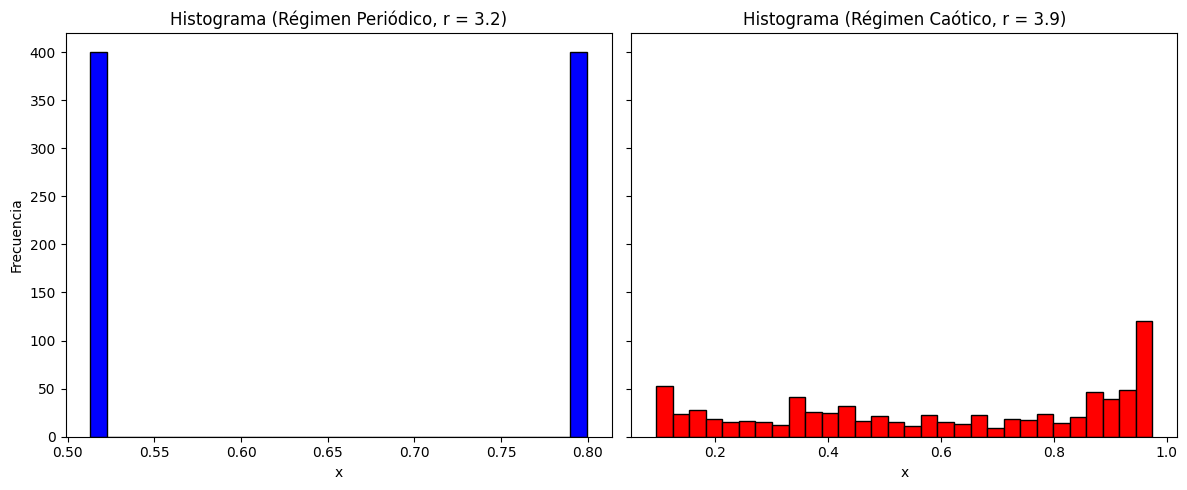

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros iniciales
def logistic_map(r, x, n_iter):
    values = []
    for _ in range(n_iter):
        x = r * x * (1 - x)
        values.append(x)
    return values

# Configuración
n_iter = 1000  # Número de iteraciones
transient = 200  # Iteraciones transitorias a descartar
x0 = 0.5  # Condición inicial

# Régimen periódico
r_periodic = 3.2  # Valor de r en régimen periódico
values_periodic = logistic_map(r_periodic, x0, n_iter)[transient:]

# Régimen caótico
r_chaotic = 3.9  # Valor de r en régimen caótico
values_chaotic = logistic_map(r_chaotic, x0, n_iter)[transient:]

# Crear gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Histograma del régimen periódico
axs[0].hist(values_periodic, bins=30, color='blue', edgecolor='black')
axs[0].set_title(f"Histograma (Régimen Periódico, r = {r_periodic})")
axs[0].set_xlabel("x")
axs[0].set_ylabel("Frecuencia")

# Histograma del régimen caótico
axs[1].hist(values_chaotic, bins=30, color='red', edgecolor='black')
axs[1].set_title(f"Histograma (Régimen Caótico, r = {r_chaotic})")
axs[1].set_xlabel("x")

# Mostrar gráficos
plt.tight_layout()
plt.show()





### C. **Figuras en el plano Xt+1 vs. Xt y Xt+2 vs. Xt en el caos**
Cuando el sistema se encuentra en un régimen caótico, su comportamiento cambia de ser periódico o predecible a ser impredecible. En los diagramas de fase, el sistema dinámico muestra diferentes características dependiendo de los tiempos que se comparen.


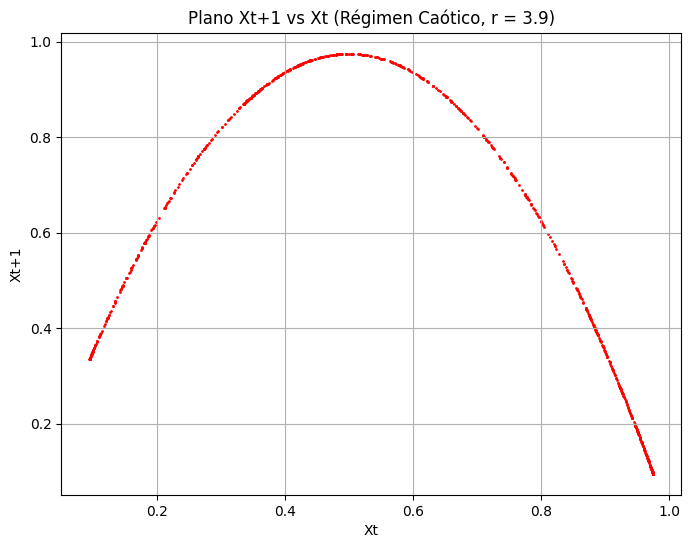

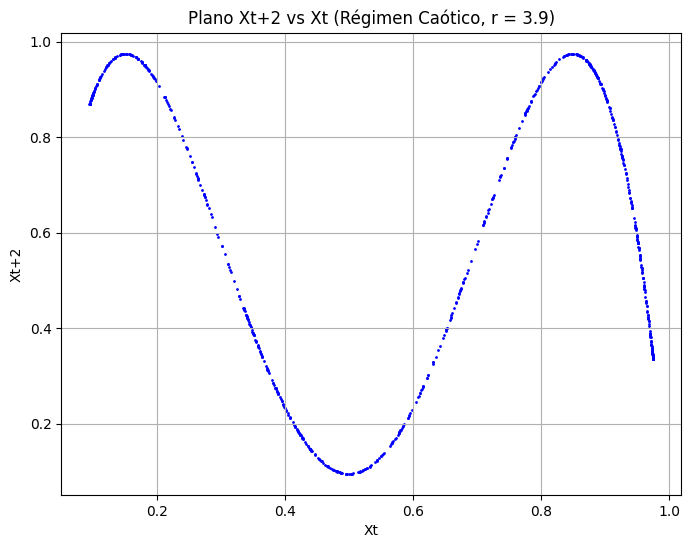

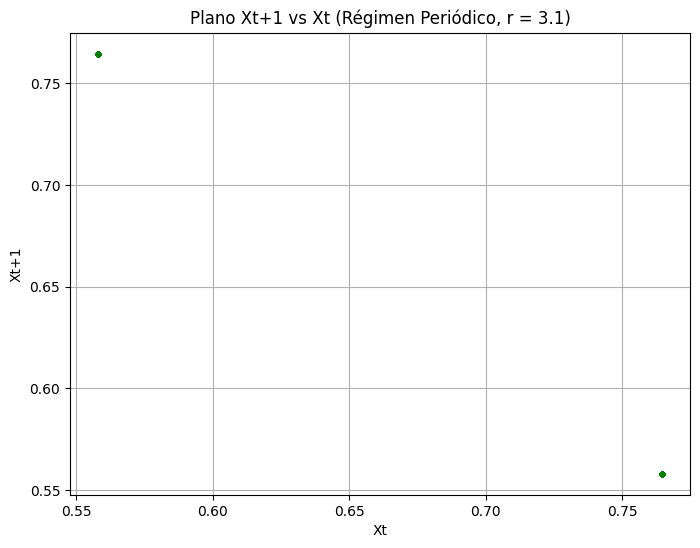

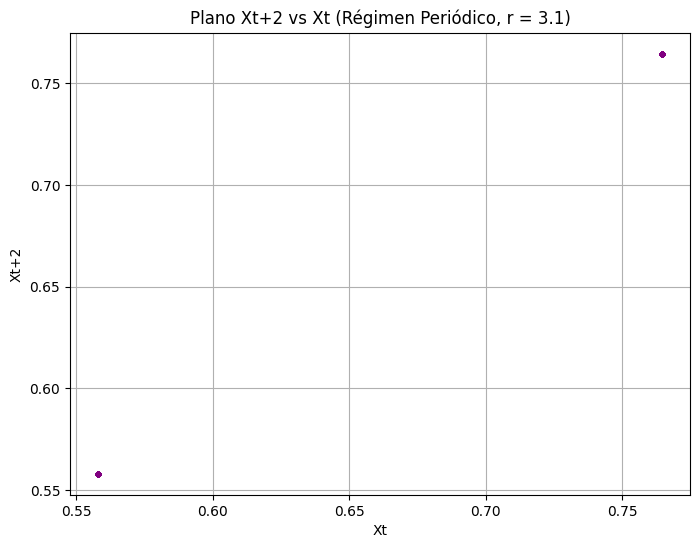

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros iniciales
def logistic_map(r, x, n_iter):
    values = []
    for _ in range(n_iter):
        x = r * x * (1 - x)
        values.append(x)
    return values

# Configuración
n_iter = 1000  # Número de iteraciones
transient = 200  # Iteraciones transitorias a descartar
x0 = 0.5  # Condición inicial

# Régimen caótico
r_chaotic = 3.9  # Valor de r en régimen caótico
values_chaotic = logistic_map(r_chaotic, x0, n_iter)
values_chaotic = values_chaotic[transient:]

# Régimen periódico
r_periodic = 3.1  # Valor de r en régimen periódico
values_periodic = logistic_map(r_periodic, x0, n_iter)
values_periodic = values_periodic[transient:]

# Crear gráfico del plano Xt+1 vs Xt (Caótico)
x_t = values_chaotic[:-1]
x_t1 = values_chaotic[1:]

plt.figure(figsize=(8, 6))
plt.scatter(x_t, x_t1, s=1, color='red')
plt.title(f"Plano Xt+1 vs Xt (Régimen Caótico, r = {r_chaotic})")
plt.xlabel("Xt")
plt.ylabel("Xt+1")
plt.grid(True)
plt.show()

# Crear gráfico del plano Xt+2 vs Xt (Caótico)
x_t2 = values_chaotic[2:]
x_t = values_chaotic[:-2]

plt.figure(figsize=(8, 6))
plt.scatter(x_t, x_t2, s=1, color='blue')
plt.title(f"Plano Xt+2 vs Xt (Régimen Caótico, r = {r_chaotic})")
plt.xlabel("Xt")
plt.ylabel("Xt+2")
plt.grid(True)
plt.show()

# Crear gráfico del plano Xt+1 vs Xt (Periódico)
x_t = values_periodic[:-1]
x_t1 = values_periodic[1:]

plt.figure(figsize=(8, 6))
plt.scatter(x_t, x_t1, s=10, color='green')
plt.title(f"Plano Xt+1 vs Xt (Régimen Periódico, r = {r_periodic})")
plt.xlabel("Xt")
plt.ylabel("Xt+1")
plt.grid(True)
plt.show()

# Crear gráfico del plano Xt+2 vs Xt (Periódico)
x_t2 = values_periodic[2:]
x_t = values_periodic[:-2]

plt.figure(figsize=(8, 6))
plt.scatter(x_t, x_t2, s=10, color='purple')
plt.title(f"Plano Xt+2 vs Xt (Régimen Periódico, r = {r_periodic})")
plt.xlabel("Xt")
plt.ylabel("Xt+2")
plt.grid(True)
plt.show()